In [1]:
import pandas as pd
import numpy as np
import re

# =========================
# 1️⃣ 读取数据
# =========================
file_path = "/Users/sk3020/Downloads/youtube_comments_donald_trump_last_year.csv"

df = pd.read_csv(file_path)

print("数据形状:", df.shape)
df.head()


数据形状: (436205, 14)


,comment_id,author,author_channel_id,created_utc,created_datetime,text,like_count,video_id,video_title,channel_title,video_published_at,reply_count,is_reply,parent_id
0,UgzxVlPjds5IVF0wMiB4AaABAg,@Jupiter-Janet2025,UC0x3eE29DoAR618spHaiBMg,2026-02-10T19:51:39Z,2026-02-10T19:51:39Z,"President Trump, you got my vote 3 times...bu...",0,rT6eucDVmFY,Super Bowl interview: Tom Llamas exclusive wit...,NBC News,2026-02-08T20:44:46Z,0,False,NaN
1,UgwH0G72wDnt3osAiq94AaABAg,@jokubassunaitis8512,UCLagn-23vPELOWn4sEWd77A,2026-02-10T18:39:54Z,2026-02-10T18:39:54Z,Nine,0,rT6eucDVmFY,Super Bowl interview: Tom Llamas exclusive wit...,NBC News,2026-02-08T20:44:46Z,0,False,NaN
2,UgyZxTLea62orltBJy94AaABAg,@bradhespe4629,UCwH0MEhHQ_Si8TAi6PmpB6w,2026-02-10T18:24:29Z,2026-02-10T18:24:29Z,Thank you President Trump \nThe common peoples...,0,rT6eucDVmFY,Super Bowl interview: Tom Llamas exclusive wit...,NBC News,2026-02-08T20:44:46Z,0,False,NaN
3,UgzaGHemI63gfO2dBgJ4AaABAg,@bbenin-tnmrtx1g,UCljpGLOgRJ8u4inAf0WBD2g,2026-02-10T15:46:58Z,2026-02-10T15:46:58Z,Dear Your Excellency President Donald Trump! O...,0,rT6eucDVmFY,Super Bowl interview: Tom Llamas exclusive wit...,NBC News,2026-02-08T20:44:46Z,0,False,NaN
4,UgzYXrlZaA10lI3Ol4p4AaABAg,@dude4173,UCBoV_KT_6lBq0bEbJcdLvEQ,2026-02-10T15:05:39Z,2026-02-10T15:05:39Z,Spineless reporters. Let’s Trump get away with...,0,rT6eucDVmFY,Super Bowl interview: Tom Llamas exclusive wit...,NBC News,2026-02-08T20:44:46Z,0,False,NaN


In [2]:
# 去重
df = df.drop_duplicates(subset="comment_id")

# 去空评论
df = df[df["text"].notna()]

print("清洗后数据形状:", df.shape)


清洗后数据形状: (436138, 14)


In [3]:
df["created_datetime"] = pd.to_datetime(df["created_datetime"], errors="coerce")

# 删除时间解析失败的行
df = df[df["created_datetime"].notna()]

# 新增日期列（用于每日聚合）
df["date"] = df["created_datetime"].dt.date

df.head()


,comment_id,author,author_channel_id,created_utc,created_datetime,text,like_count,video_id,video_title,channel_title,video_published_at,reply_count,is_reply,parent_id,date
0,UgzxVlPjds5IVF0wMiB4AaABAg,@Jupiter-Janet2025,UC0x3eE29DoAR618spHaiBMg,2026-02-10T19:51:39Z,2026-02-10 19:51:39+00:00,"President Trump, you got my vote 3 times...bu...",0,rT6eucDVmFY,Super Bowl interview: Tom Llamas exclusive wit...,NBC News,2026-02-08T20:44:46Z,0,False,NaN,2026-02-10
1,UgwH0G72wDnt3osAiq94AaABAg,@jokubassunaitis8512,UCLagn-23vPELOWn4sEWd77A,2026-02-10T18:39:54Z,2026-02-10 18:39:54+00:00,Nine,0,rT6eucDVmFY,Super Bowl interview: Tom Llamas exclusive wit...,NBC News,2026-02-08T20:44:46Z,0,False,NaN,2026-02-10
2,UgyZxTLea62orltBJy94AaABAg,@bradhespe4629,UCwH0MEhHQ_Si8TAi6PmpB6w,2026-02-10T18:24:29Z,2026-02-10 18:24:29+00:00,Thank you President Trump \nThe common peoples...,0,rT6eucDVmFY,Super Bowl interview: Tom Llamas exclusive wit...,NBC News,2026-02-08T20:44:46Z,0,False,NaN,2026-02-10
3,UgzaGHemI63gfO2dBgJ4AaABAg,@bbenin-tnmrtx1g,UCljpGLOgRJ8u4inAf0WBD2g,2026-02-10T15:46:58Z,2026-02-10 15:46:58+00:00,Dear Your Excellency President Donald Trump! O...,0,rT6eucDVmFY,Super Bowl interview: Tom Llamas exclusive wit...,NBC News,2026-02-08T20:44:46Z,0,False,NaN,2026-02-10
4,UgzYXrlZaA10lI3Ol4p4AaABAg,@dude4173,UCBoV_KT_6lBq0bEbJcdLvEQ,2026-02-10T15:05:39Z,2026-02-10 15:05:39+00:00,Spineless reporters. Let’s Trump get away with...,0,rT6eucDVmFY,Super Bowl interview: Tom Llamas exclusive wit...,NBC News,2026-02-08T20:44:46Z,0,False,NaN,2026-02-10


In [4]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)  # 去URL
    text = re.sub(r"[^a-z\s]", " ", text)  # 只保留字母
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_text"] = df["text"].apply(clean_text)

df.head()


,comment_id,author,author_channel_id,created_utc,created_datetime,text,like_count,video_id,video_title,channel_title,video_published_at,reply_count,is_reply,parent_id,date,clean_text
0,UgzxVlPjds5IVF0wMiB4AaABAg,@Jupiter-Janet2025,UC0x3eE29DoAR618spHaiBMg,2026-02-10T19:51:39Z,2026-02-10 19:51:39+00:00,"President Trump, you got my vote 3 times...bu...",0,rT6eucDVmFY,Super Bowl interview: Tom Llamas exclusive wit...,NBC News,2026-02-08T20:44:46Z,0,False,NaN,2026-02-10,president trump you got my vote times but i am...
1,UgwH0G72wDnt3osAiq94AaABAg,@jokubassunaitis8512,UCLagn-23vPELOWn4sEWd77A,2026-02-10T18:39:54Z,2026-02-10 18:39:54+00:00,Nine,0,rT6eucDVmFY,Super Bowl interview: Tom Llamas exclusive wit...,NBC News,2026-02-08T20:44:46Z,0,False,NaN,2026-02-10,nine
2,UgyZxTLea62orltBJy94AaABAg,@bradhespe4629,UCwH0MEhHQ_Si8TAi6PmpB6w,2026-02-10T18:24:29Z,2026-02-10 18:24:29+00:00,Thank you President Trump \nThe common peoples...,0,rT6eucDVmFY,Super Bowl interview: Tom Llamas exclusive wit...,NBC News,2026-02-08T20:44:46Z,0,False,NaN,2026-02-10,thank you president trump the common peoples p...
3,UgzaGHemI63gfO2dBgJ4AaABAg,@bbenin-tnmrtx1g,UCljpGLOgRJ8u4inAf0WBD2g,2026-02-10T15:46:58Z,2026-02-10 15:46:58+00:00,Dear Your Excellency President Donald Trump! O...,0,rT6eucDVmFY,Super Bowl interview: Tom Llamas exclusive wit...,NBC News,2026-02-08T20:44:46Z,0,False,NaN,2026-02-10,dear your excellency president donald trump ou...
4,UgzYXrlZaA10lI3Ol4p4AaABAg,@dude4173,UCBoV_KT_6lBq0bEbJcdLvEQ,2026-02-10T15:05:39Z,2026-02-10 15:05:39+00:00,Spineless reporters. Let’s Trump get away with...,0,rT6eucDVmFY,Super Bowl interview: Tom Llamas exclusive wit...,NBC News,2026-02-08T20:44:46Z,0,False,NaN,2026-02-10,spineless reporters let s trump get away with ...


评论总数: 436138
时间范围:
最早: 2025-03-15 20:42:26+00:00
最晚: 2026-02-10 20:51:12+00:00


<Axes: title={'center': 'Daily Comment Count'}, xlabel='date'>

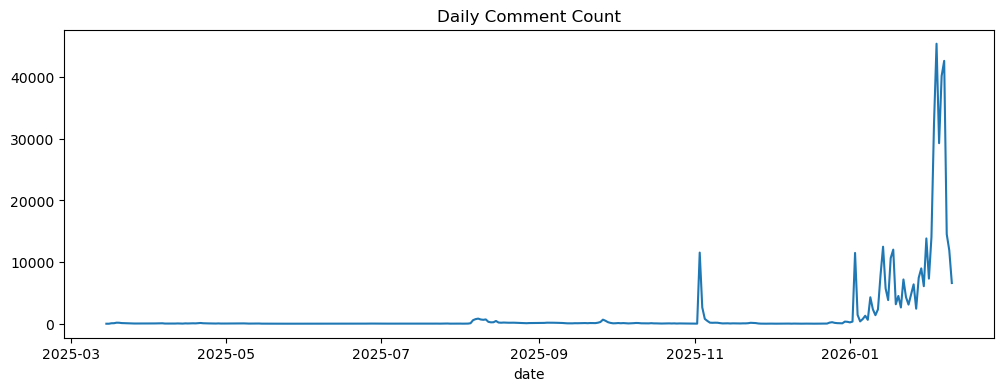

In [5]:
print("评论总数:", len(df))
print("时间范围:")
print("最早:", df["created_datetime"].min())
print("最晚:", df["created_datetime"].max())

df["date"].value_counts().sort_index().plot(figsize=(12,4), title="Daily Comment Count")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sk3020/nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sk3020/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


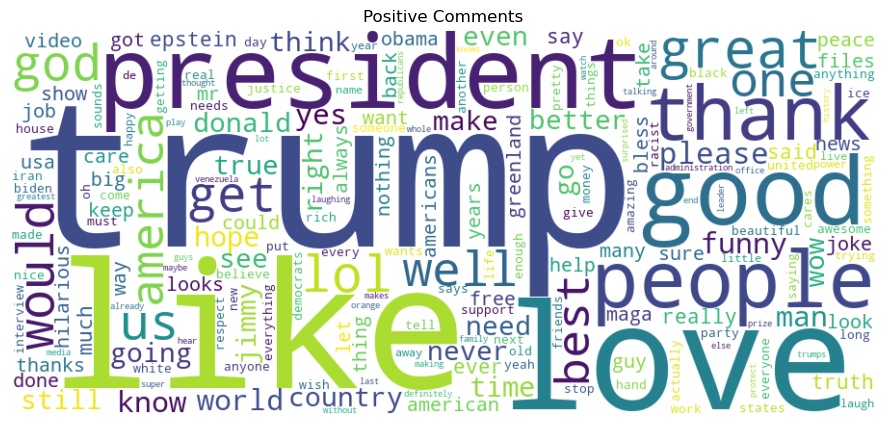

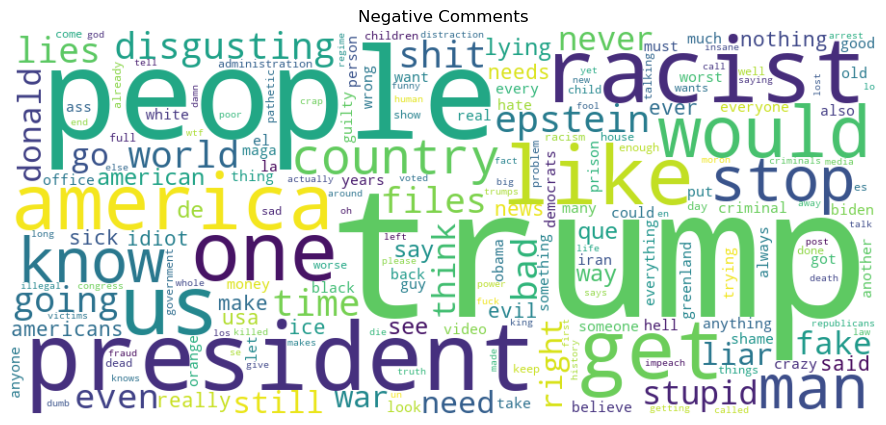

In [6]:
!pip install nltk wordcloud scikit-learn

import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sia = SentimentIntensityAnalyzer()

df["sentiment"] = df["clean_text"].apply(
    lambda x: sia.polarity_scores(x)["compound"]
)

positive = df[df["sentiment"] > 0.2]["clean_text"]
negative = df[df["sentiment"] < -0.2]["clean_text"]

def make_wordcloud(text_series, title):
    stop_words = stopwords.words('english')
    vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=300)
    X = vectorizer.fit_transform(text_series)
    freqs = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1))

    wc = WordCloud(width=900, height=400, background_color='white')
    wc.generate_from_frequencies(freqs)

    plt.figure(figsize=(12,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

make_wordcloud(positive, "Positive Comments")
make_wordcloud(negative, "Negative Comments")


In [7]:
def classify_stance(row):
    if row["sentiment"] > 0.2:
        return "support"
    elif row["sentiment"] < -0.2:
        return "oppose"
    return "neutral"

df["stance"] = df.apply(classify_stance, axis=1)

df["stance"].value_counts()


stance
neutral    160117
oppose     156170
support    119851
Name: count, dtype: int64

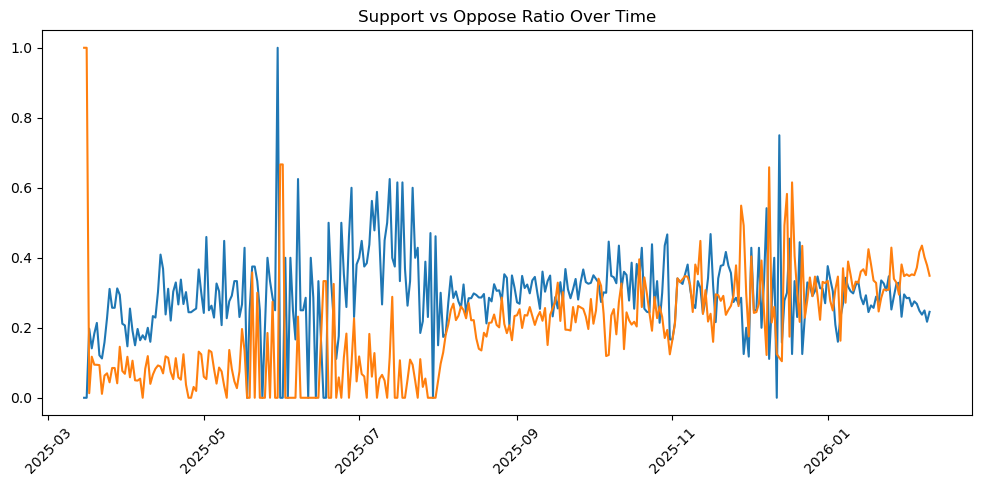

In [8]:
daily = df.groupby(["date", "stance"]).size().unstack(fill_value=0)

daily["support_ratio"] = daily["support"] / daily.sum(axis=1)
daily["oppose_ratio"] = daily["oppose"] / daily.sum(axis=1)

plt.figure(figsize=(12,5))
plt.plot(daily.index, daily["support_ratio"])
plt.plot(daily.index, daily["oppose_ratio"])
plt.title("Support vs Oppose Ratio Over Time")
plt.xticks(rotation=45)
plt.show()


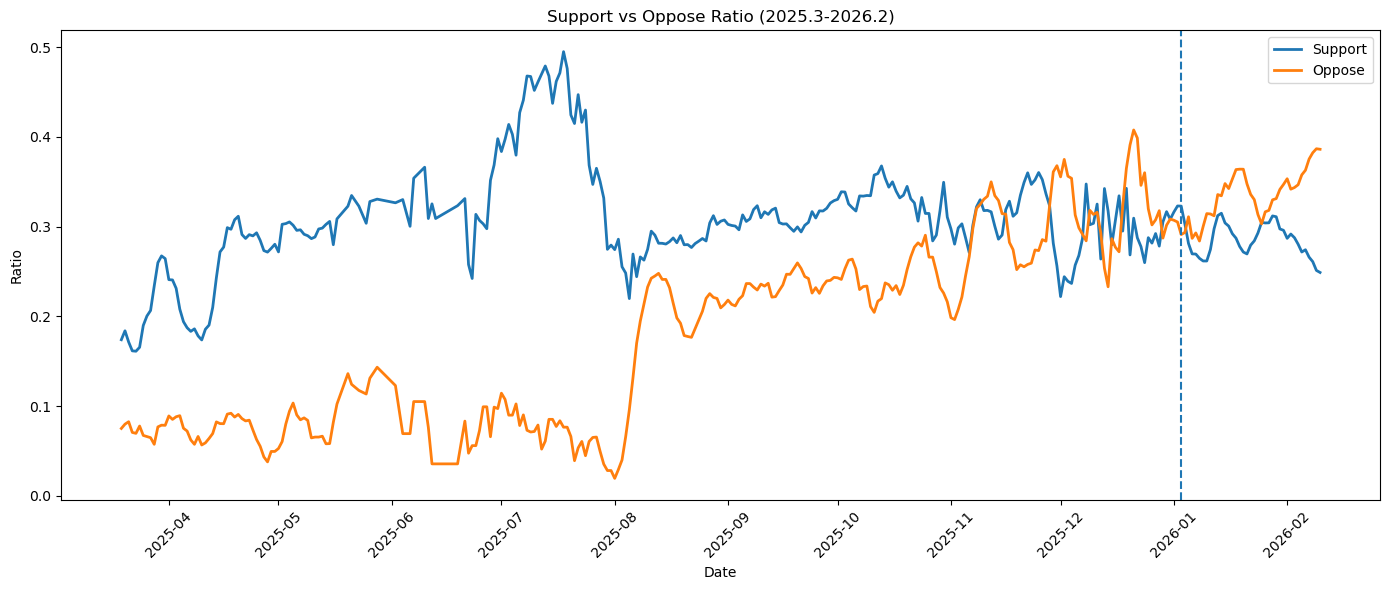

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# =========================
# 参数
# =========================
MIN_DAILY_N = 5
event_date = pd.to_datetime("2026-01-03")

# =========================
# 1️⃣ 重新计算每日评论数
# =========================
daily_counts = (
    df.groupby(["date", "stance"])
      .size()
      .unstack(fill_value=0)
)

# 确保列存在（避免某类缺失报错）
for col in ["support", "oppose", "neutral"]:
    if col not in daily_counts.columns:
        daily_counts[col] = 0

# 总评论数
daily_counts["total_count"] = daily_counts[
    ["support", "oppose", "neutral"]
].sum(axis=1)

# =========================
# 2️⃣ 筛选 ≥ 50 条的日期
# =========================
daily_counts = daily_counts[
    daily_counts["total_count"] >= MIN_DAILY_N
]

# 排序 & 转 datetime index
daily_counts = daily_counts.sort_index()
daily_counts.index = pd.to_datetime(daily_counts.index)

# =========================
# 3️⃣ 计算比例
# =========================
daily_counts["support_ratio"] = (
    daily_counts["support"] / daily_counts["total_count"]
)

daily_counts["oppose_ratio"] = (
    daily_counts["oppose"] / daily_counts["total_count"]
)

# 7日滚动平均（减少波动）
daily_counts["support_smooth"] = (
    daily_counts["support_ratio"].rolling(7, min_periods=3).mean()
)

daily_counts["oppose_smooth"] = (
    daily_counts["oppose_ratio"].rolling(7, min_periods=3).mean()
)

# =========================
# 4️⃣ 画图
# =========================
plt.figure(figsize=(14,6))

plt.plot(
    daily_counts.index,
    daily_counts["support_smooth"],
    label="Support",
    linewidth=2
)

plt.plot(
    daily_counts.index,
    daily_counts["oppose_smooth"],
    label="Oppose",
    linewidth=2
)

# 事件标注
plt.axvline(
    event_date,
    linestyle="--"
)

plt.title("Support vs Oppose Ratio (2025.3-2026.2)")
plt.xlabel("Date")
plt.ylabel("Ratio")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


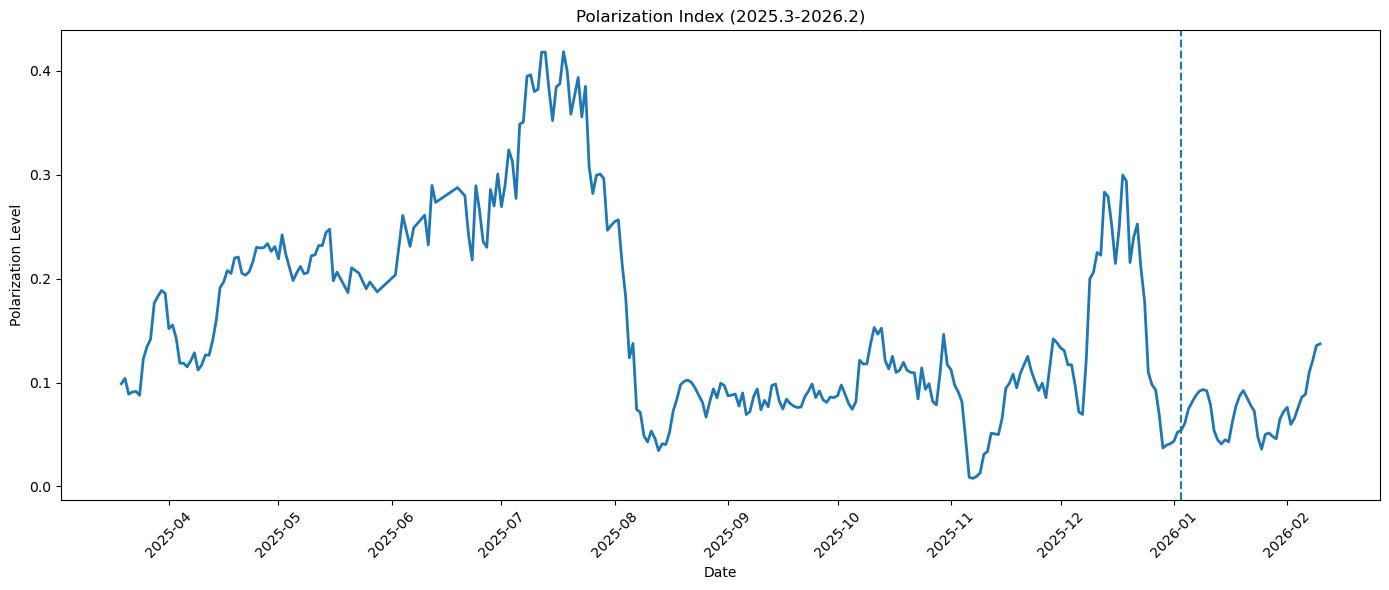

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# =========================
# 参数
# =========================
MIN_DAILY_N = 5
event_date = pd.to_datetime("2026-01-03")

# =========================
# 1️⃣ 每日聚合
# =========================
daily_pol = (
    df.groupby(["date", "stance"])
      .size()
      .unstack(fill_value=0)
)

# 防止某些列缺失
for col in ["support", "oppose", "neutral"]:
    if col not in daily_pol.columns:
        daily_pol[col] = 0

daily_pol["total_count"] = daily_pol[
    ["support", "oppose", "neutral"]
].sum(axis=1)

# =========================
# 2️⃣ 过滤 ≥50 评论
# =========================
daily_pol = daily_pol[
    daily_pol["total_count"] >= MIN_DAILY_N
]

daily_pol.index = pd.to_datetime(daily_pol.index)
daily_pol = daily_pol.sort_index()

# =========================
# 3️⃣ 计算比例
# =========================
daily_pol["support_ratio"] = (
    daily_pol["support"] / daily_pol["total_count"]
)

daily_pol["oppose_ratio"] = (
    daily_pol["oppose"] / daily_pol["total_count"]
)

# =========================
# 4️⃣ 极化指数
# =========================
daily_pol["polarization_index"] = abs(
    daily_pol["support_ratio"] -
    daily_pol["oppose_ratio"]
)

# 7 日滚动平均
daily_pol["polarization_smooth"] = (
    daily_pol["polarization_index"]
        .rolling(7, min_periods=3)
        .mean()
)

# =========================
# 5️⃣ 画图
# =========================
plt.figure(figsize=(14,6))

plt.plot(
    daily_pol.index,
    daily_pol["polarization_smooth"],
    linewidth=2
)

plt.axvline(
    event_date,
    linestyle="--"
)

plt.title("Polarization Index (2025.3-2026.2)")
plt.xlabel("Date")
plt.ylabel("Polarization Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to /Users/sk3020/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sk3020/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /Users/sk3020/nltk_data...
[nltk_data] Downloading package omw-1.4 to /Users/sk3020/nltk_data...


[nltk_data] Downloading package brown to /Users/sk3020/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sk3020/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sk3020/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/sk3020/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/sk3020/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/sk3020/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


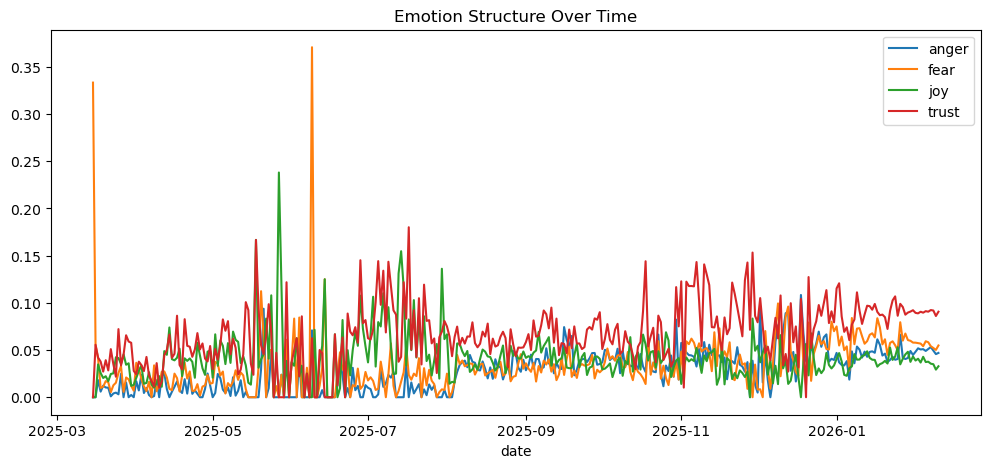

In [27]:

import sys
import nltk

# 下载 NLTK 资源
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("wordnet")
nltk.download("omw-1.4")

# 下载 textblob 语料
!{sys.executable} -m textblob.download_corpora

from nrclex import NRCLex

def emotion_scores(text):
    emo = NRCLex(text)
    return emo.affect_frequencies

df["emotion_dict"] = df["clean_text"].apply(emotion_scores)

emotion_df = pd.json_normalize(df["emotion_dict"])
emotion_df["date"] = df["date"]

daily_emotions = emotion_df.groupby("date").mean()

daily_emotions[["anger","fear","joy","trust"]].plot(figsize=(12,5))
plt.title("Emotion Structure Over Time")
plt.show()


In [28]:
!pip install emoji
import emoji
from collections import Counter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 6.3 MB/s eta 0:00:00


In [35]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Apple Color Emoji'

def extract_emojis(text):
    return [e["emoji"] for e in emoji.emoji_list(text)]

df["emoji_list"] = df["text"].apply(extract_emojis)


emoji_counter = Counter()
for lst in df["emoji_list"]:
    emoji_counter.update(lst)

top20 = emoji_counter.most_common(20)

for i in range(0, len(top20), 5):
    line = top20[i:i+5]
    print(", ".join([repr(t) for t in line]))



('😂', 71952), ('❤', 18047), ('🤣', 11311), ('😅', 10019), ('😮', 6845)
('🇺🇸', 6819), ('💙', 5768), ('😢', 5752), ('🎉', 5640), ('💩', 4604)
('🙏', 4349), ('😊', 3679), ('🤮', 3584), ('👍', 3577), ('👏', 3545)
('😡', 2941), ('🤬', 2537), ('🤔', 2522), ('❤️', 2427), ('🤡', 2356)


In [45]:
def word_count(text):
    return len(str(text).split())

df["word_count"] = df["text"].apply(word_count)

# 过滤条件
filtered_positive = df[
    (df["sentiment"] > 0.8) &
    (df["word_count"] < 300) &
    (df["clean_text"].str.contains("trump", na=False))
]

extreme_positive = filtered_positive.sort_values(
    "sentiment", ascending=False
).head(10)

# 负面也同样过滤
filtered_negative = df[
    (df["sentiment"] < -0.8) &
    (df["word_count"] < 300)
]

extreme_negative = filtered_negative.sort_values(
    "sentiment"
).head(10)

print("=== 🔥 Most Positive Comments ===")
for _, row in extreme_positive.iterrows():
    print("\nSentiment:", round(row["sentiment"],10))
    print(truncate_by_words(row["text"], max_words=100))

print("\n=== 💣 Most Negative Comments ===")
for _, row in extreme_negative.iterrows():
    print("\nSentiment:", round(row["sentiment"],10))
    print(truncate_by_words(row["text"], max_words=100))



=== 🔥 Most Positive Comments ===

Sentiment: 0.998
HEBREWS 1:9 You have loved righteousness and hated wickedness; REVELATION 22:12 “ Look, I am coming soon! 13 I am the Alpha and the Omega, the First and the Last, the Beginning and the End. How so an awesome and so a the powerful our the truth the Greatest the King God is this night specially! Our the Most High the Holy God own made so a wonderful the Holy Ghost the Spirit of so a beautiful and so a big the Holy Ghost the Crosses on the carpet and on the wall sides and on the ceiling so a...

Sentiment: 0.9975
Tom Llamas is a smart, fair, great reporter. I love the respect he shows to the President. Which is a much earned respect. Tom asks President Trump the questions we Americans want asked! Thanks Tom. Great job in a day when all the Dems and fake news just say horrible things about President Trump. Only because he’s President Trump. Thanks for asking about the $2000 for all Americans. It makes sense for people making under $200,000

In [46]:
import spacy
from collections import Counter
import pandas as pd

nlp = spacy.load("en_core_web_sm")

person_counter = Counter()
all_person_mentions = []

for text in df["clean_text"]:
    doc = nlp(str(text))
    persons = list(set(
        ent.text.strip()
        for ent in doc.ents
        if ent.label_ == "PERSON"
    ))
    all_person_mentions.append(persons)
    person_counter.update(persons)

# 取前20
top20 = [p for p, _ in person_counter.most_common(20)]

print("Top 20 Persons:")
print(top20)


Top 20 Persons:
['don', 'doesn', 'donald trump', 'putin', 'god', 'clinton', 'donald', 'maga', 'jesus', 'jimmy', 'bill clinton', 'joe biden', 'trumps', 'obama', 'tim scott', 'jimmy kimmel', 'trump doesn', 'trump s', 'david', 'eu']


In [50]:
def normalize_name(name):
    name = name.lower().strip()

    # 统一 Trump
    if "trump" in name or name == "donald":
        return "Donald Trump"

    # Biden
    if "biden" in name:
        return "Joe Biden"

    # Clinton
    if "clinton" in name:
        return "Bill Clinton"

    # Obama
    if "obama" in name:
        return "Barack Obama"

    # Putin
    if "putin" in name:
        return "Vladimir Putin"

    # Tim Scott
    if "tim scott" in name:
        return "Tim Scott"

    # Jimmy Kimmel
    if "jimmy kimmel" in name:
        return "Jimmy Kimmel"

    # 其余一律过滤掉
    return None


In [52]:
raw_top20 = [
'don', 'doesn', 'donald trump', 'putin', 'god',
'clinton', 'donald', 'maga', 'jesus', 'jimmy',
'bill clinton', 'joe biden', 'trumps',
'obama', 'tim scott', 'jimmy kimmel',
'trump doesn', 'trump s', 'david', 'eu'
]

normalized = [normalize_name(name) for name in raw_top20]
normalized = [n for n in normalized if n is not None]

valid_political_figures = sorted(set(normalized))

print("Political Figures：")
print(valid_political_figures)


Political Figures：
['Barack Obama', 'Bill Clinton', 'Donald Trump', 'Jimmy Kimmel', 'Joe Biden', 'Tim Scott', 'Vladimir Putin']


In [53]:
import networkx as nx
from itertools import combinations
from collections import Counter

G = nx.Graph()
mention_counter = Counter()
all_mentions = []

for text in df["clean_text"]:
    doc = nlp(text)
    persons = set()

    for ent in doc.ents:
        if ent.label_ == "PERSON":
            norm = normalize_name(ent.text)
            if norm in valid_political_figures:
                persons.add(norm)

    if persons:
        all_mentions.append(persons)
        mention_counter.update(persons)

# 添加节点
for person in valid_political_figures:
    if person in mention_counter:
        G.add_node(person, mentions=mention_counter[person])

# 添加加权边
for persons in all_mentions:
    for p1, p2 in combinations(persons, 2):
        if G.has_edge(p1, p2):
            G[p1][p2]["weight"] += 1
        else:
            G.add_edge(p1, p2, weight=1)


In [54]:
import pandas as pd

pagerank = nx.pagerank(G)

centrality_df = pd.DataFrame({
    "mentions": dict(G.nodes(data="mentions")),
    "pagerank": pagerank
}).sort_values("pagerank", ascending=False)

centrality_df



,mentions,pagerank
Donald Trump,12582,0.370659
Bill Clinton,2468,0.173622
Barack Obama,1683,0.133570
Joe Biden,1410,0.127059
Vladimir Putin,2436,0.118489
Tim Scott,686,0.040113
Jimmy Kimmel,660,0.036487


In [59]:
import community as community_louvain

# resolution 越大 → 社区越多
partition = community_louvain.best_partition(G, resolution=1.5)

# 转成字典形式
communities = {}
for node, com in partition.items():
    communities.setdefault(com, []).append(node)

for i, nodes in communities.items():
    print(f"Community {i+1}:")
    print(nodes)
    print()


Community 1:
['Barack Obama']

Community 2:
['Bill Clinton', 'Joe Biden']

Community 3:
['Donald Trump', 'Tim Scott', 'Vladimir Putin']

Community 4:
['Jimmy Kimmel']

